In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

import Lift_class


# Introduction

Each lift object is initialised with a terminal velocity $v_\mathrm{terminal}$ (floors per unit time), a number of floors it takes to reach terminal velocity, $N_\mathrm{terminal}$, and a maximum number of floors in the building $N_\mathrm{max}$. <br>
This notebook is for investigating how the parameters of a lift affect performance when considering a *single* lift that only takes one occupant at a time for single journeys. 

## Assumptions

Assume constant acceleration until the lift reaches terminal velocity $v_\mathrm{terminal}$. This termianl velocity is reached after a set number of floors $N_\mathrm{terminal}$. <br>
Ignoring decelration for stopping, assume this happens instantaneously. <br>
We are ignoring the time it takes for the occupants to exit and enter the lift. <br>
We assume that the only journey requests are people on the ground floor going up to some floor and people on some other floor requesting to go down to the ground. The probability of getting each of these two types of requests is equal.

In [2]:
N_term_dict = {}
# min_floors = 2
floors = 30
N_term = 3
# floors_list = np.arange(min_floors, max_floors, 1)

lift_test = Lift_class.Lift_timesteps(terminal_vel=0.2, N_terminal=N_term, max_floors=floors)

lift_test.info()

lift_test.Perform_timestep(1)

lift_test.Update_target(6)

print()
lift_test.info()

Located at floor 0.
Terminal velocity is 0.2 floors per unit time.
Reaches terminal velocity after 3 floors.
Maximum floor is 30.
Current time is 0 timesteps.
Current target floor is None.
Current velocity is 0.

Located at floor 0.
Terminal velocity is 0.2 floors per unit time.
Reaches terminal velocity after 3 floors.
Maximum floor is 30.
Current time is 1 timesteps.
Current target floor is 6.
Current velocity is 0.


In [3]:
for i in range(10):
    lift_test.Perform_timestep(1)

    print(f"acceleration: {lift_test.acceleration}")
    print(lift_test.velocity)

print(lift_test.info())

acceleration: 0
0.2
acceleration: 0
0.2
acceleration: 0
0.2
acceleration: 0
0.2
acceleration: 0
0.2
acceleration: 0
0.2
acceleration: 0
0.2
acceleration: 0
0.2
acceleration: 0
0.2
acceleration: 0
0.2
Located at floor 6.
Terminal velocity is 0.2 floors per unit time.
Reaches terminal velocity after 3 floors.
Maximum floor is 30.
Current time is 11 timesteps.
Current target floor is 6.
Current velocity is 0.2.
None


In [4]:
def Produce_request(lift):
    # Half the time it's someone on the ground floor wanting to go up
    rng = np.random.default_rng() #No seed, pulled from OS!
    number = rng.random() 

    floor_num = np.random.randint(0, lift.max_floors)
    
    if number < 0.5: #Going up
        Request_from = 0
        Request_direction = "up"
        Request_to = floor_num
    else: #Going down
        Request_from = floor_num
        Request_direction = "down"
        Request_to = 0

    lift.request_from(Request_from, Request_direction)
    lift.request_to(Request_to)

    

## Defining algorithms

In [36]:
def Algo_linear_order(lift):
    """Completes one request at a time, in the order they arrive. No direction information used."""
    for i, request in enumerate(lift.requests):
        lift.move_to(list(request.keys())[0])
        lift.add_time_move(lift.last_journey_distance)
        lift.move_to(lift.requests_to[i])
        lift.add_time_move(lift.last_journey_distance)


In [37]:
for i in range(50):
    Produce_request(lift_1)

Algo_linear_order(lift_1)

print(lift_1.total_time)
print(lift_1.num_stops)


44142.420046711995
2200


## Plotting

In [59]:
# Make lifts with different max floors and plot the mean time per stop (assume it will be linear relationsihp)
# floors_list = []
# mean_time_list = []
N_term_dict = {}
min_floors = 2
max_floors = 30
floors_list = np.arange(min_floors, max_floors, 1)

for N_term in range(0, 8, 1):
    # floors_list = []
    mean_time_list = []
    for floors in range(min_floors, max_floors, 1):
        lift_test = Lift_class.Lift(terminal_vel=2, N_terminal=N_term, max_floors=floors)
        for i in range(10000):
            Produce_request(lift_test)

        Algo_linear_order(lift_test)

        mean_time = lift_test.total_time/lift_test.num_stops
        # floors_list.append(floors)
        mean_time_list.append(mean_time)

    N_term_dict[N_term] = mean_time_list





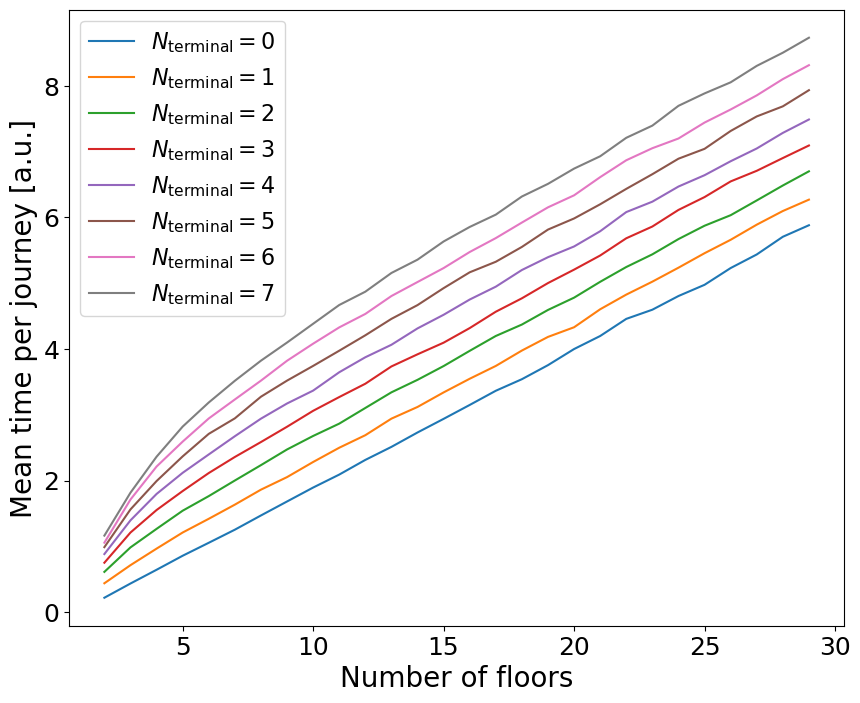

In [65]:
plt.figure(figsize=[10,8])


for N_term in N_term_dict:
    plt.plot(floors_list,N_term_dict[N_term], label=r"$N_\mathrm{terminal}=$" + f"{N_term}")

plt.xlabel("Number of floors", fontsize=20)
plt.ylabel("Mean time per journey [a.u.]", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)